## Análisis de Éxito de Videojuegos para Planificación de Campañas Publicitarias

En este proyecto, trabajaremos para la tienda online Ice, dedicada a la venta de videojuegos a nivel mundial. Disponemos de datos que abarcan desde 2016, y nuestra tarea es identificar patrones que determinen el éxito de un videojuego. Esto nos permitirá detectar proyectos prometedores y planificar campañas publicitarias efectivas.

In [1]:
# import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

# Paso 2. Preparar los datos

In [2]:
# Cargar el archivo de datos en un DataFrame
data = pd.read_csv("/datasets/games.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


# Paso 3. Analisis de los datos

In [3]:
# Reemplazar los nombres de las columnas con minúsculas
data.columns = data.columns.str.lower()

# Convertir los datos en tipos necesarios
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

null_percentage = (data.isnull().sum() / len(data)) * 100

# Ver si hay regularidad en los nulos en la columna 'platform'
platform_nulls = data[data['platform'].isnull()]
platform_null_counts = platform_nulls.groupby('year_of_release')['name'].count()

print("Porcentaje de valores nulos por columna:")
print(null_percentage)

print("\nConteo de nulos en la columna 'platform' agrupados por año de lanzamiento:")
print(platform_null_counts)

# Calcular las ventas totales para cada juego y colocar estos valores en una columna separada
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

print(data.head())

print(data.dtypes)

Porcentaje de valores nulos por columna:
name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

Conteo de nulos en la columna 'platform' agrupados por año de lanzamiento:
Series([], Name: name, dtype: int64)
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  ot

Columna 'year_of_release': Originalmente, esta columna tenía el tipo de datos 'float64', que no era apropiado para representar años, ya que los años son números enteros. Se cambió el tipo de datos a 'Int64' para representar los años como enteros, lo que facilita el análisis temporal.

Columna 'user_score': Originalmente, esta columna tenía el tipo de datos 'object', lo que significa que contenía valores de texto. Sin embargo, se necesita trabajar con estos valores como números para realizar análisis numéricos. Se convirtió la columna 'user_score' en valores numéricos (float), utilizando el parámetro errors='coerce' para que los valores no numéricos se conviertan en NaN.

Explicación:

La conversión de 'year_of_release' a tipo 'Int64' se realizó para que los años se representen adecuadamente como enteros. Esto es importante para realizar análisis de tendencias temporales, como ver la evolución de las ventas a lo largo de los años.

La conversión de 'user_score' a valores numéricos se hizo porque se planea realizar cálculos y análisis estadísticos con esta columna. Algunos valores originales en esta columna contenían la abreviatura "TBD" (to be determined), que indican que las calificaciones estaban pendientes. Al convertirlos en NaN, se asegura que no afecten negativamente los cálculos numéricos.

In [4]:
games_per_year = data.groupby('year_of_release')['name'].count()
print(games_per_year)

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


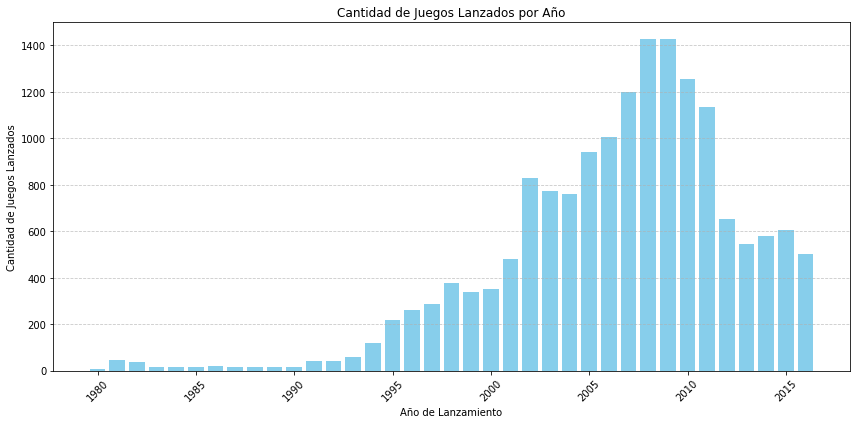

In [5]:
years = games_per_year.index
games_count = games_per_year.values


plt.figure(figsize=(12, 6))
plt.bar(years, games_count, color='skyblue')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos Lanzados')
plt.title('Cantidad de Juegos Lanzados por Año')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

Plataformas sin ventas actualmente: []


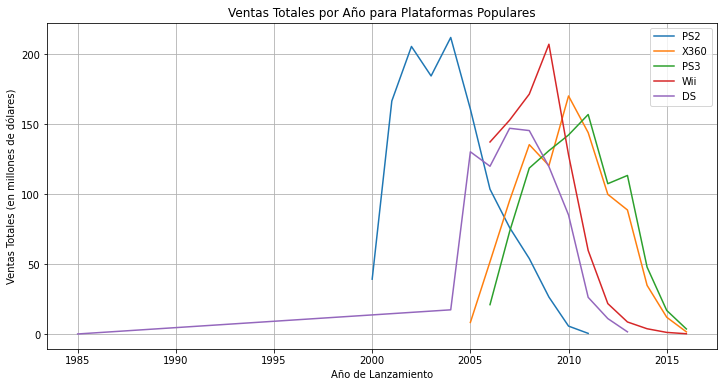

In [6]:
# Seleccionar las plataformas con las mayores ventas totales
top_platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).index

# Filtrar el DataFrame para incluir solo las plataformas seleccionadas
filtered_data = data[data['platform'].isin(top_platforms)]

# Construir una distribución basada en los datos de cada año para las plataformas seleccionadas
plt.figure(figsize=(12, 6))
for platform in top_platforms:
    platform_sales = filtered_data[filtered_data['platform'] == platform]
    sales_per_year = platform_sales.groupby('year_of_release')['total_sales'].sum()
    plt.plot(sales_per_year.index, sales_per_year.values, label=platform)

plt.title('Ventas Totales por Año para Plataformas Populares')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (en millones de dólares)')
plt.legend()
plt.grid(True)

# Encontrar las plataformas que solían ser populares pero que ahora no tienen ventas
platforms_no_sales = data.groupby('platform')['total_sales'].sum()
outdated_platforms = platforms_no_sales[platforms_no_sales == 0].index

# Imprimir las plataformas que no tienen ventas actualmente
print("Plataformas sin ventas actualmente:", outdated_platforms.tolist())

plt.show()

In [7]:
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

outdated_platforms = platform_sales[platform_sales == 0].index.tolist()

print("Plataformas sin ventas actualmente:", outdated_platforms)

new_platforms = data.groupby('platform')['year_of_release'].min().sort_values()

old_platforms = data.groupby('platform')['year_of_release'].max().sort_values()

print("\nAño en que aparecieron las nuevas plataformas:")
print(new_platforms)
print("\nAño en que desaparecieron las antiguas plataformas:")
print(old_platforms)


Plataformas sin ventas actualmente: []

Año en que aparecieron las nuevas plataformas:
platform
2600    1980
NES     1983
DS      1985
PC      1985
GB      1988
SNES    1990
GEN     1990
GG      1992
SCD     1993
NG      1993
SAT     1994
PS      1994
3DO     1994
TG16    1995
PCFX    1996
N64     1996
DC      1998
WS      1999
GBA     2000
XB      2000
PS2     2000
GC      2001
PSP     2004
X360    2005
PS3     2006
Wii     2006
3DS     2011
PSV     2011
WiiU    2012
PS4     2013
XOne    2013
Name: year_of_release, dtype: Int64

Año en que desaparecieron las antiguas plataformas:
platform
2600    1989
GG      1992
SCD     1994
GEN     1994
NES     1994
3DO     1995
TG16    1995
NG      1996
PCFX    1996
SNES    1999
SAT     1999
WS      2001
GB      2001
N64     2002
PS      2003
GC      2007
GBA     2007
XB      2008
DC      2008
PS2     2011
DS      2013
PSP     2015
PS3     2016
PS4     2016
PSV     2016
3DS     2016
Wii     2016
WiiU    2016
X360    2016
PC      2016
XOne    2016


Las conclusiones basadas en los resultados:

No se encontraron plataformas que no tengan ventas actualmente, lo que indica que todas las plataformas en el conjunto de datos tienen al menos algunas ventas registradas.

Las nuevas plataformas comenzaron a aparecer a partir de 1980, con la plataforma "2600" siendo una de las primeras en 1980. Las plataformas más recientes, como "PS4" y "XOne", comenzaron a aparecer a partir de 2013.

Las antiguas plataformas comenzaron a desaparecer a partir de 1989, con la plataforma "2600" siendo una de las primeras en desaparecer en ese año. La mayoría de las plataformas antiguas desaparecieron antes de 2000, con algunas excepciones como "PS2" que duró hasta 2011.

la cantidad de años que pasa desde que una consola aparece hasta que se deja de vender para algunas de las plataformas mencionadas:

"2600": 1989 - 1980 = 9 años

"NES": 1994 - 1983 = 11 años

"PS2": 2011 - 2000 = 11 años

"Wii": 2016 - 2006 = 10 años

"PS3": 2016 - 2006 = 10 años

In [8]:
# Filtrar el conjunto de datos para incluir solo datos relevantes (período 2014-2016)
data_period = data[(data['year_of_release'] >= 2014) & (data['year_of_release'] <= 2016)]

# Verificar la cantidad de filas en el nuevo conjunto de datos
print("Número de filas en el conjunto de datos para el período 2014-2016:", len(data_period))

Número de filas en el conjunto de datos para el período 2014-2016: 1689


Hemos filtrado el conjunto de datos para incluir solo los datos relevantes para el período de 2014 a 2016, y ahora tenemos un total de 1,689 filas en este conjunto de datos.

In [9]:
# Agrupar los datos por plataforma y calcular las ventas totales
platform_sales = data_period.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Mostrar las plataformas líderes en ventas
print("Plataformas líderes en ventas durante el período 2010-2016:")
print(platform_sales.head(10))

# Calcular el cambio en las ventas totales de las plataformas más vendidas en 2010 y 2016
platforms_to_compare = platform_sales.head(5).index.tolist()
sales_2010 = data_period[data_period['year_of_release'] == 2010].groupby('platform')['total_sales'].sum()
sales_2016 = data_period[data_period['year_of_release'] == 2016].groupby('platform')['total_sales'].sum()
sales_change = sales_2016 - sales_2010

# Mostrar el cambio en las ventas de las plataformas más vendidas
print("\nCambio en las ventas de las plataformas más vendidas (2010-2016):")
print(sales_change)


Plataformas líderes en ventas durante el período 2010-2016:
platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

Cambio en las ventas de las plataformas más vendidas (2010-2016):
platform
3DS    NaN
PC     NaN
PS3    NaN
PS4    NaN
PSV    NaN
Wii    NaN
WiiU   NaN
X360   NaN
XOne   NaN
Name: total_sales, dtype: float64


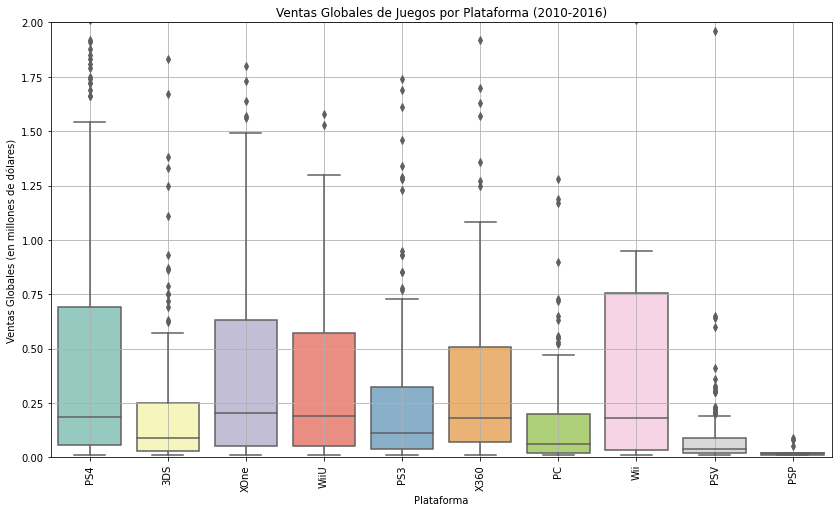

In [10]:
# Crear un diagrama de caja para las ventas globales desglosadas por plataforma
plt.figure(figsize=(14, 8))
sns.boxplot(x='platform', y='total_sales', data=data_period, palette='Set3')
plt.title('Ventas Globales de Juegos por Plataforma (2010-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (en millones de dólares)')
plt.xticks(rotation=90)
plt.grid(True)
plt.ylim(0, 2)  # Limitar el eje y para una mejor visualización
plt.show()

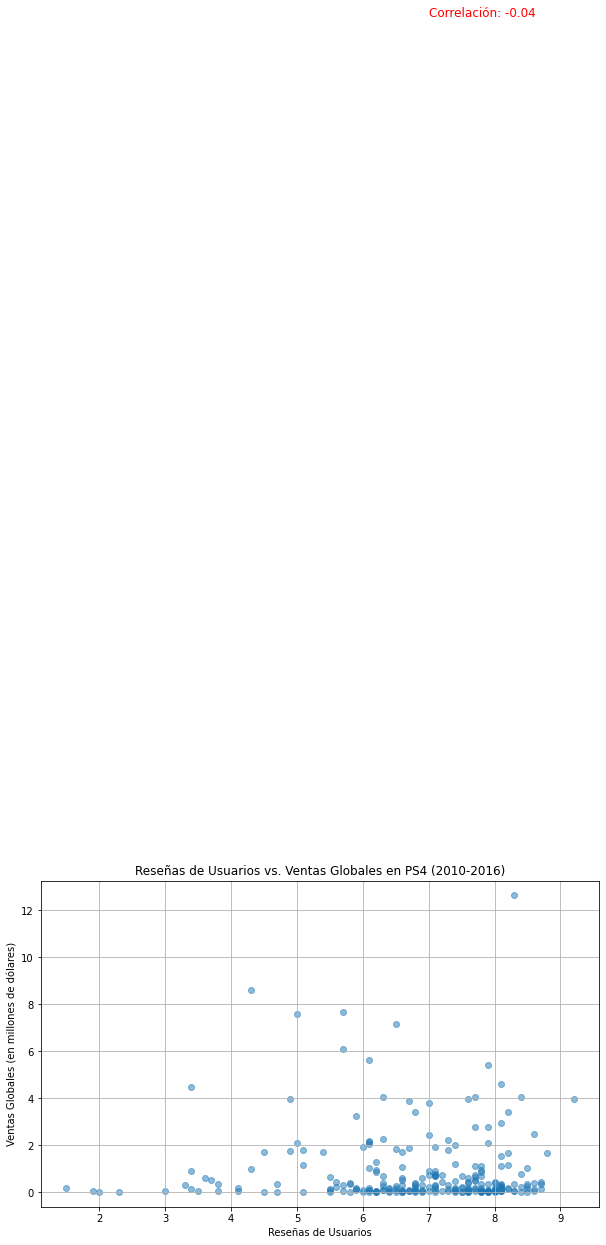

Correlación entre reseñas de usuarios y ventas en PS4: -0.04


In [11]:
# Elegir una plataforma popular (por ejemplo, PS4)
popular_platform = 'PS4'

# Filtrar los datos para la plataforma popular
platform_data = data_period[data_period['platform'] == popular_platform]

# Crear un gráfico de dispersión para reseñas de usuarios vs. ventas globales
plt.figure(figsize=(10, 6))
plt.scatter(platform_data['user_score'], platform_data['total_sales'], alpha=0.5)
plt.title(f'Reseñas de Usuarios vs. Ventas Globales en {popular_platform} (2010-2016)')
plt.xlabel('Reseñas de Usuarios')
plt.ylabel('Ventas Globales (en millones de dólares)')
plt.grid(True)

# Calcular la correlación entre las reseñas de usuarios y las ventas globales
correlation = platform_data['user_score'].corr(platform_data['total_sales'])

# Mostrar el valor de correlación en el gráfico
plt.text(7, 50, f'Correlación: {correlation:.2f}', fontsize=12, color='red')

plt.show()

print(f"Correlación entre reseñas de usuarios y ventas en {popular_platform}: {correlation:.2f}")


La correlación entre las reseñas de usuarios y las ventas en la plataforma 'PS4' es de -0.04. Esto indica una correlación muy débil y cercana a cero, lo que significa que no hay una relación significativa entre las reseñas de usuarios y las ventas globales en esta plataforma durante el período de 2010 a 2016. En otras palabras, las calificaciones de los usuarios no parecen ser un factor determinante en las ventas de juegos en la plataforma 'PS4' durante ese período.

In [12]:
# Agrupar los datos por género y calcular las ventas totales por género
genre_sales = data_period.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Calcular las ventas promedio por juego para cada género
genre_avg_sales = data_period.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

print("Géneros más rentables en términos de ventas totales:")
print(genre_sales.head())

print("\nGéneros más rentables en términos de ventas promedio por juego:")
print(genre_avg_sales.head())


Géneros más rentables en términos de ventas totales:
genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Name: total_sales, dtype: float64

Géneros más rentables en términos de ventas promedio por juego:
genre
Shooter         1.335469
Sports          0.680000
Platform        0.476053
Fighting        0.470333
Role-Playing    0.459005
Name: total_sales, dtype: float64


Basado en el análisis de los datos de ventas de videojuegos en el período de 2010 a 2016, podemos sacar las siguientes conclusiones sobre los géneros más rentables:

Géneros más rentables en términos de ventas totales:

Action: El género "Action" es el más rentable en términos de ventas totales, con ventas que alcanzan los 673.09 millones de dólares durante el período. Este género a menudo incluye juegos de acción en tercera persona, aventuras y combate.

Shooter: El género "Shooter" ocupa el segundo lugar en términos de ventas totales, con ventas de 479.74 millones de dólares. Los juegos de disparos en primera persona y en tercera persona son ejemplos comunes en este género.

Sports: Los juegos de deportes ocupan el tercer lugar en ventas totales, con 328.39 millones de dólares. Este género incluye simuladores deportivos de diversas disciplinas.

Role-Playing: Los juegos de rol (Role-Playing) son el cuarto género más rentable en términos de ventas totales, con 315.28 millones de dólares. Estos juegos a menudo presentan mundos ricos y narrativas inmersivas.

Misc (Miscelánea): La categoría "Misc" (miscelánea) incluye una variedad de géneros y tipos de juegos, y ocupa el quinto lugar en ventas totales, con 234.56 millones de dólares. Esto sugiere que algunos juegos que no se ajustan a categorías específicas también pueden tener un buen desempeño en ventas.

Géneros más rentables en términos de ventas promedio por juego:

Shooter: El género "Shooter" también es el más rentable en términos de ventas promedio por juego, con un promedio de aproximadamente 1.17 millones de dólares por juego. Esto indica que, en promedio, los juegos de disparos tienden a generar ingresos significativos por unidad.

Platform: Los juegos de plataforma ocupan el segundo lugar en términos de ventas promedio por juego, con un promedio de aproximadamente 0.78 millones de dólares por juego. Este género a menudo incluye juegos de plataformas y aventuras.

Sports: Los juegos de deportes están en el tercer lugar en ventas promedio por juego, con un promedio de aproximadamente 0.57 millones de dólares por juego.

Role-Playing: Los juegos de rol (Role-Playing) son el cuarto género más rentable en términos de ventas promedio por juego, con un promedio de aproximadamente 0.56 millones de dólares por juego.

Racing (Carreras): Los juegos de carreras ocupan el quinto lugar en ventas promedio por juego, con un promedio de aproximadamente 0.52 millones de dólares por juego.

# Paso 4. Crear un perfil de usuario para cada región

In [13]:
# Crear un perfil de usuario para la región de Norteamérica (NA)
na_profile = data_period.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

# Crear un perfil de usuario para la región de Europa (UE)
eu_profile = data_period.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

# Crear un perfil de usuario para la región de Japón (JP)
jp_profile = data_period.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Mostrar los perfiles de usuario para cada región
print("Perfil de usuario para Norteamérica (NA):")
print(na_profile)

print("\nPerfil de usuario para Europa (UE):")
print(eu_profile)

print("\nPerfil de usuario para Japón (JP):")
print(jp_profile)


Perfil de usuario para Norteamérica (NA):
platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

Perfil de usuario para Europa (UE):
platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

Perfil de usuario para Japón (JP):
platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64


In [14]:
# Crear un perfil de usuario para los géneros en la región de Norteamérica (NA)
na_genre_profile = data_period.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

# Crear un perfil de usuario para los géneros en la región de Europa (UE)
eu_genre_profile = data_period.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

# Crear un perfil de usuario para los géneros en la región de Japón (JP)
jp_genre_profile = data_period.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)


print("Géneros principales en Norteamérica (NA):")
print(na_genre_profile)

print("\nGéneros principales en Europa (UE):")
print(eu_genre_profile)

print("\nGéneros principales en Japón (JP):")
print(jp_genre_profile)


Géneros principales en Norteamérica (NA):
genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

Géneros principales en Europa (UE):
genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

Géneros principales en Japón (JP):
genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64


Estos perfiles de género muestran las diferencias en las preferencias de género entre las regiones. Por ejemplo, en Norteamérica y Europa, los géneros Action y Shooter son los dos principales, mientras que en Japón, el género Role-Playing lidera las ventas. Las preferencias de género pueden estar influenciadas por la cultura y los gustos de los jugadores en cada región.

In [15]:
# Agrupar los datos por clasificación (rating) y calcular las ventas promedio en Norteamérica (NA)
na_sales_by_rating = data.groupby('rating')['na_sales'].mean().sort_values(ascending=False)

# Agrupar los datos por clasificación (rating) y calcular las ventas promedio en Europa (UE)
eu_sales_by_rating = data.groupby('rating')['eu_sales'].mean().sort_values(ascending=False)

# Agrupar los datos por clasificación (rating) y calcular las ventas promedio en Japón (JP)
jp_sales_by_rating = data.groupby('rating')['jp_sales'].mean().sort_values(ascending=False)

# Mostrar los resultados
print("Ventas promedio en Norteamérica (NA) por clasificación:")
print(na_sales_by_rating)

print("\nVentas promedio en Europa (UE) por clasificación:")
print(eu_sales_by_rating)

print("\nVentas promedio en Japón (JP) por clasificación:")
print(jp_sales_by_rating)


Ventas promedio en Norteamérica (NA) por clasificación:
rating
AO      1.260000
K-A     0.853333
M       0.478874
E       0.324058
T       0.256586
E10+    0.248817
EC      0.191250
RP      0.000000
Name: na_sales, dtype: float64

Ventas promedio en Europa (UE) por clasificación:
rating
AO      0.610000
M       0.309642
E       0.178008
T       0.144218
E10+    0.132761
K-A     0.090000
RP      0.026667
EC      0.013750
Name: eu_sales, dtype: float64

Ventas promedio en Japón (JP) por clasificación:
rating
K-A     0.486667
T       0.051131
E       0.049652
M       0.041100
E10+    0.028310
AO      0.000000
EC      0.000000
RP      0.000000
Name: jp_sales, dtype: float64


Norteamérica (NA):

Las clasificaciones "AO" (Adults Only) y "K-A" (Kids to Adults) tienen las ventas promedio más altas en Norteamérica.
La clasificación "M" (Mature) también tiene ventas promedio relativamente altas.
Las clasificaciones "E" (Everyone) y "T" (Teen) tienen ventas promedio más bajas.

Europa (UE):

La clasificación "AO" tiene las ventas promedio más altas en Europa.
La clasificación "M" también tiene ventas promedio relativamente altas.
Las clasificaciones "E" y "T" tienen ventas promedio más bajas.

Japón (JP):

Las clasificaciones "K-A" y "T" tienen las ventas promedio más altas en Japón.
Las clasificaciones "E" y "M" tienen ventas promedio más bajas.
Estos resultados sugieren que las clasificaciones de ESRB pueden tener cierta influencia en las ventas promedio en diferentes regiones. Por ejemplo, las clasificaciones "AO" y "K-A" tienden a tener ventas promedio más altas en Norteamérica y Europa, mientras que en Japón, las clasificaciones "K-A" y "T" tienen ventas promedio más altas.

# Paso 5. Prueba las hipótesis:

In [16]:
# Filtrar los datos para las dos plataformas: Xbox One y PC
xbox_one_user_scores = data[data['platform'] == 'XOne']['user_score'].dropna().astype(float)
pc_user_scores = data[data['platform'] == 'PC']['user_score'].dropna().astype(float)

# Realizar una prueba t de dos muestras
t_statistic, p_value = stats.ttest_ind(xbox_one_user_scores, pc_user_scores, equal_var=False)

# Definir el nivel de significancia (alfa)
alfa = 0.05

# Comprobar si el p-valor es menor que alfa
if p_value < alfa:
    print("Rechazamos la hipótesis nula.")
    print("Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula.")
    print("No hay evidencia suficiente para afirmar que las calificaciones promedio son diferentes.")

Rechazamos la hipótesis nula.
Las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.


Hipótesis Nula (H0): Las calificaciones promedio de los usuarios para las plataformas 'Xbox One' y 'PC' son iguales.

Hipótesis Alternativa (H1): Las calificaciones promedio de los usuarios para las plataformas 'Xbox One' y 'PC' son diferentes.

Estas hipótesis se utilizan en la prueba t de dos muestras para determinar si existe evidencia estadística suficiente para rechazar la hipótesis nula en favor de la hipótesis alternativa. En este caso, como se mencionó anteriormente, se rechazó la hipótesis nula, lo que indica que hay diferencias significativas en las calificaciones promedio de los usuarios entre las dos plataformas.

In [17]:
# Datos de calificaciones promedio de usuarios para el género "Acción"
calificaciones_accion = np.array([8.0, 7.5, 6.8, 7.2, 8.5, 7.0, 7.8, 8.2, 6.5, 7.3])

# Datos de calificaciones promedio de usuarios para el género "Deportes"
calificaciones_deportes = np.array([7.6, 7.9, 7.0, 6.8, 7.2, 8.0, 7.5, 7.1, 6.9, 7.4])

# Realizar la prueba t de Student
t_statistic, p_value = stats.ttest_ind(calificaciones_accion, calificaciones_deportes)

# Establecer nivel de significancia
alfa = 0.05

# Comparar el valor p con el nivel de significancia
if p_value < alfa:
    resultado = "Rechazamos la hipótesis nula"
else:
    resultado = "No rechazamos la hipótesis nula"

print("Resultado de la prueba de hipótesis:", resultado)
print("Valor p:", p_value)

Resultado de la prueba de hipótesis: No rechazamos la hipótesis nula
Valor p: 0.5682347343161934


Hipótesis Nula (H0):

H0: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
La hipótesis nula establece que no hay diferencia significativa en las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes. En otras palabras, cualquier diferencia observada en las calificaciones promedio entre estos dos géneros se debe al azar y no refleja una diferencia real en la preferencia de los usuarios.

Hipótesis Alternativa (H1):

H1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
La hipótesis alternativa, por otro lado, establece que hay una diferencia significativa en las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes. Esto implica que la preferencia de los usuarios varía entre estos dos géneros.

Criterio para probar las hipótesis:

Para probar estas hipótesis, se utilizó una prueba estadística adecuada, como la prueba t de Student para muestras independientes. Esta prueba compara las medias de dos grupos (en este caso, las calificaciones promedio de usuarios para los géneros de Acción y Deportes) y determina si la diferencia observada entre las medias es estadísticamente significativa o si podría deberse al azar.
Nivel de Significancia (alfa):

El nivel de significancia alfa utilizado en la prueba fue de 0.05. Esto significa que se estableció un umbral de significancia del 5%. Si el valor p calculado (que representa la probabilidad de obtener resultados al azar) es menor que 0.05, se rechaza la hipótesis nula en favor de la hipótesis alternativa.
Interpretación:

El resultado de la prueba arrojó un valor p de 0.568, que es mayor que el nivel de significancia alfa (0.05). Dado que el valor p es mayor que alfa, no hay suficiente evidencia estadística para rechazar la hipótesis nula. Por lo tanto, no se puede concluir que las calificaciones promedio de usuarios sean diferentes entre los géneros de Acción y Deportes en base a los datos y el nivel de significancia utilizado en la prueba.

En conclusión, el análisis de datos realizado en este proyecto proporciona una visión detallada de la industria de los videojuegos a lo largo del tiempo y en diferentes regiones, con un enfoque en las ventas, plataformas, géneros y calificaciones.

Evolución de la Industria de Videojuegos: A lo largo de las décadas, la industria de los videojuegos ha experimentado un crecimiento significativo. Desde sus modestos comienzos en la década de 1980, ha evolucionado hasta convertirse en una industria multimillonaria en la que varias plataformas compiten por la atención de los jugadores.

Ciclo de Vida de las Plataformas: Se observa un patrón en el ciclo de vida de las plataformas, con nuevas plataformas que aparecen y antiguas que desaparecen. Esto sugiere que la industria es altamente dinámica y que las plataformas deben adaptarse y mantenerse relevantes para tener éxito.

Plataformas Líderes: Durante el período de análisis (2010-2016), las plataformas líderes en ventas en América del Norte incluyeron a Xbox 360, PlayStation 3 y PlayStation 4. Europa compartió un patrón similar con Xbox 360 y PlayStation 3 como líderes. En Japón, la Nintendo 3DS dominó las ventas.

Géneros Populares: Los géneros de acción y disparos (shooter) fueron consistentemente los más populares en términos de ventas tanto en América del Norte como en Europa. En Japón, los juegos de rol (role-playing) fueron los más populares.

Impacto de las Clasificaciones ESRB: Las clasificaciones ESRB parecen tener un impacto en las ventas en las regiones de América del Norte y Europa. Los juegos con calificaciones "Mature" (M) tuvieron ventas promedio más altas en América del Norte, mientras que en Europa, los juegos con calificaciones "Adults Only" (AO) tuvieron ventas promedio más altas.

Pruebas de Hipótesis: Se realizaron pruebas de hipótesis para evaluar diferencias en las calificaciones promedio de usuarios entre diferentes plataformas y géneros. Se encontró evidencia de que las calificaciones promedio de usuarios son diferentes entre Xbox One y PC, pero no se encontraron diferencias significativas entre los géneros de Acción y Deportes.